# Lorenz attractor and other chaotic systems

Other potentially interesting systems for the future (just in case):

* https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor
* https://en.wikipedia.org/wiki/Tinkerbell_map


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prettyplot(f, n=500):
    """Get a function, and plot first 5000 points of it"""
    plt.figure(figsize=(14,3))
    plt.plot(f(n));

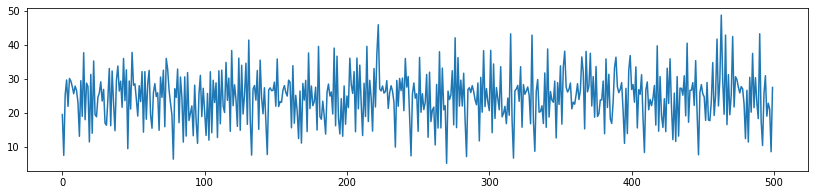

In [4]:
def lorenz(n, start=None, alpha=0.01, sigma=10, beta=8/3, rho=28):
    """Generate a sequence of N steps of a Lorenz system, starting with START.
    Solved using Eurler with step of alpha, but resampled at Δt=1. Is it good?"""
    if not start: start = (1,0,1)
    (x,y,z) = start
    full_n = round(n/alpha)
    history = np.zeros(n)
    (t, j) = (0, 0)         # Starting time and sampling counter
    for i in range(full_n):
        x,y,z = (x + alpha*sigma*(y - x),
                 y + alpha*(x*(rho-z) - y),
                 z + alpha*(x*y - beta*z))
        t += alpha
        if t>=1:
            history[j] = z
            t += -1
            j += 1
    return history
    
prettyplot(lorenz)

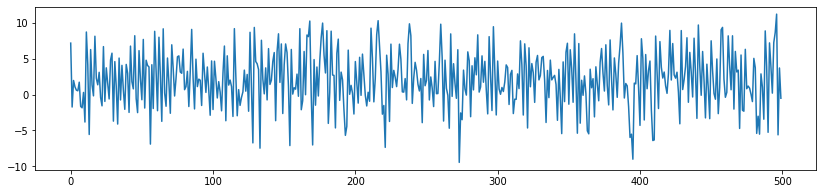

In [19]:
def l96(n, start=None, alpha=0.01, a=8):
    """Lorenz96 model: https://en.wikipedia.org/wiki/Lorenz_96_model"""
    if not start: start = np.linspace(0.5, 1, 5)
    full_n = round(n/alpha)
    history = np.zeros(n)
    (t, j) = (0, 0)         # Starting time and sampling counter
    k = len(start)
    x = np.array(start)    
    d = np.zeros(k)
    for i in range(full_n):
        for c in range(k):      # For every variable
            d[c] = (x[(c+1) % k] - x[c-2])*x[c-1] - x[c] + a
        x += alpha*d        
        t += alpha
        if t>=1:
            history[j] = x[0]
            t += -1
            j += 1
    return history
    
prettyplot(l96)

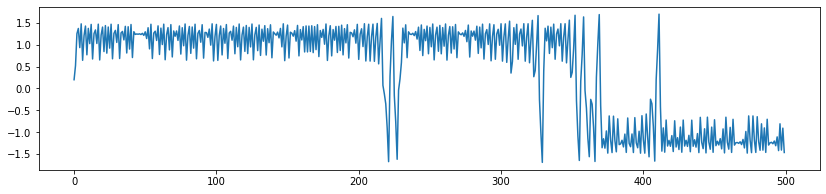

In [6]:
def duffing(n, start=None, a=2.75, b=0.2):
    """Duffing map. https://en.wikipedia.org/wiki/Duffing_map"""    
    if not start: start = (0.1, 0.2)
    (x,y) = start
    h = np.zeros(n)
    for i in range(n):
        (x,y) = (y , -b*x + a*y - y**3)
        h[i] = x
    return h

prettyplot(duffing)

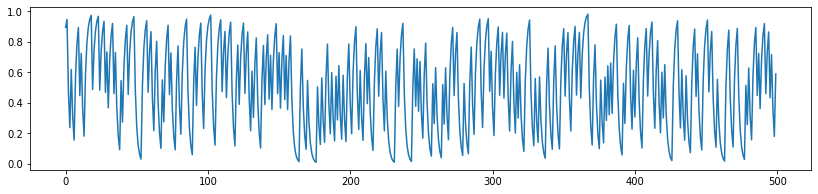

In [5]:
def baker(n, start=None):
    """Baker's map: https://en.wikipedia.org/wiki/Baker%27s_map """
    if not start: start = (0.789, 0.789)
    (x,y) = start
    history = np.zeros(n)
    for i in range(n):
        x = x*1.999 # Not exactly 2 to avoid a stable point
        if x>1:
            x = x-1
            y = y+1
        y = y/2
        history[i] = y
    return history

prettyplot(baker)

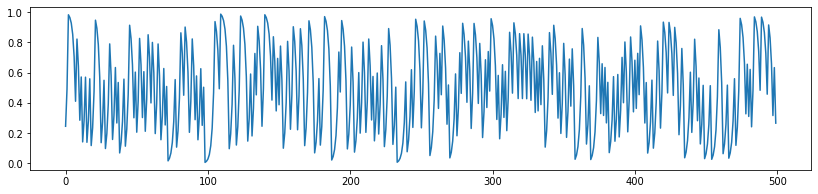

In [7]:
def diadic(n, start=None):
    """Diadic map: https://en.wikipedia.org/wiki/Dyadic_transformation"""    
    if not start: start = 0.123
    x = start
    h = np.zeros(n)
    for i in range(n):
        x = (1.999*x) % 1
        h[i] = x
    return h

prettyplot(diadic)

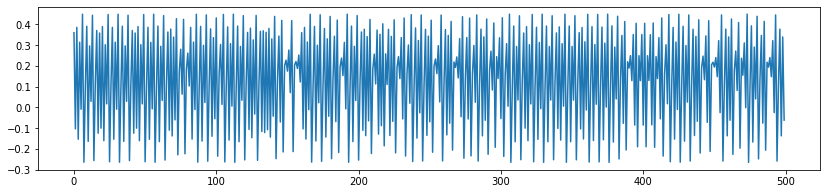

In [8]:
def mouse(n, start=None, a=6.2, b=-0.55):
    """Gauss mouse map: https://en.wikipedia.org/wiki/Gauss_iterated_map"""    
    if not start: start = 0.123    
    x = start
    h = np.zeros(n)
    for i in range(n):
        x = np.exp(-a*(x**2)) + b
        h[i] = x
    return h

prettyplot(mouse)

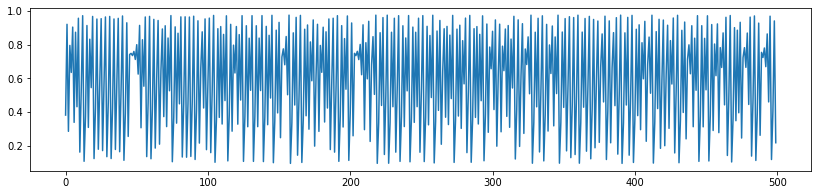

In [12]:
def verhulst(n, start=None, r=3.9):
    """Logistic map: https://en.wikipedia.org/wiki/Logistic_map"""    
    if not start: start = 0.11
    x = start
    h = np.zeros(n)
    for i in range(n):
        x = r*x*(1-x)
        h[i] = x
    return h

prettyplot(verhulst)